# Part 2: Exploratory Data Analysis with Python Libraries (Using Docker)

An **EDA** definition:  *any method of looking at data that does not include formal statistical modeling and inference falls under the term exploratory data analysis* from **Experimental Design and Analysis** by Howard J. Seltman 

## Outline
   ### 1. Dataset
### 2. Brief intro to Pandas Dataframes and Series using the dataset
### 3. Data Types
### 4. Processing the data for modeling (to continue into the next session, using scikit-learn)
### 5. Exploring the variables in the data

### Dataset
Housing data sales of __[Ames, Iowa](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)__
*In reality, data is usually messy, not small enough to be retrieved by one download or on __[Kaggle](https://www.kaggle.com/datasets)__ - as can be downloaded from __[here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)__.*
Description: It is a list of the sales of individual residential property in Ames, Iowa from 2006 to 2010.  There are
1460 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.  These 80 variables focus on the quality and quantity of many physical attributes of the property.

In [1]:
import pandas as pd
import numpy as np
#changing from the default of 60 to 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt

%matplotlib inline

### Pandas Dataframes and Series

A **Dataframe** and **Series** are two of the __[data structures in Pandas](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)__. 
- A Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
- A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types akin to a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input
- Both have methods that can be accessed by . dot notation.  They share many similiar methods, but DataFrame methods have specific methods that deal with having more than one column. You can add another Series (or equivalent object) to a DataFrame, while adding a Series to another Series involves creating a DataFrame.

Under the hood, Pandas data structures are implemented using hash tables for linear time selection and data alignment.  Most of pandas relies heavily on the ndarray. Beneath the index, columns, and data are NumPy ndarrays.

Let's get started ...

Load the CSV file into a pandas dataframe using the function __[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)__ as is.

In [2]:
housing = pd.read_csv('data/housing_original.csv')
housing.head() #head function shows the first 5 rows, by default.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.tail(8) #tail function shows the first 5 rows, by default. Passing an int changes this

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Accessing Dataframe elements

In [4]:
columns = housing.columns
index = housing.index #optional to set your own 
data = housing.values

# Get number of rows and columns
housing.shape

(1460, 81)

In [5]:
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ..., 
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [7]:
index.values

array([   0,    1,    2, ..., 1457, 1458, 1459])

In [8]:
type(data)

numpy.ndarray

### Accessing a column/Series
Selecting a single column of data as a Series

In [9]:
housing['HouseStyle'].head() #case sensitive column string

0    2Story
1    1Story
2    2Story
3    2Story
4    2Story
Name: HouseStyle, dtype: object

In [10]:
housing.HouseStyle.head() #also case sensitive

0    2Story
1    1Story
2    2Story
3    2Story
4    2Story
Name: HouseStyle, dtype: object

*In case the data you import has "messy" columns, that is, columns with space or random symbols, and you want to be able to have the option to access a column this way you can edit the column names.  _[This](https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd)_ article has a quick line of code to fix that.*
```
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
```
FYI: [Chaining](#chaining) of dataframe methods are used for this line of code.

### Selecting subsets of the dataframe

A lot more about indexing and selecting data [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [11]:
housing.iloc[[3]] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [12]:
housing[10:15]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000


#### Boolean Indexing
More documentation on boolean indexing/filtering [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing).

In [13]:
housing[housing['SalePrice']>450000] #boolean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hi

#### Sorting example
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

In [14]:
housing.sort_values(by=['SalePrice'], axis=0, ascending=False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


### Data Types
This CSV file's column datatypes are inferred by default.  There are some cases where you might want to specify the dtypes of the columns, or change them.
The __[main datatypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes)__ are: ``float``, ``int``, ``bool``, ``datetime64[ns]`` and ``datetime64[ns, tz]``, ``timedelta[ns]``, ``category`` and ``object`` 

In [15]:
housing.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [16]:
housing.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [17]:
type(housing)

pandas.core.frame.DataFrame

In [18]:
type(housing['HouseStyle'])

pandas.core.series.Series

In [19]:
types=housing['HouseStyle']
types.head()

0    2Story
1    1Story
2    2Story
3    2Story
4    2Story
Name: HouseStyle, dtype: object

In [20]:
types.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

### Processing the data for modeling 

No blanks, NULLs, or non-numerical values can be input to Scikit learn.  Regardless of how you will model your data, investigating your data is important to understand it and check for any surprises.

In [21]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
#descriptive statistics summary of one column
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Column breakdown

Can visit this link for the full data dictionary:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


**Target**:  SalesPrice
Type: Numerical (Int)
 
**Numerical Variables**:  (leave these as is, they are float or int)

``numerical_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']``

       
**Categorical Variables**: (perform one hot encoding on these strings)
Options to encode variables:
- Scikit Learn's ``OneHotEncoder`` cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.

- ``pandas.get_dummies`` by default, only converts string columns into one-hot representation, unless columns are specified.

``cate_cols=['SaleCondition','MSZoning','Street','Alley','LotShape', 'LandContour', 'Utilities','LotConfig','LandSlope', 'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']``
'MSSubClass' (this is an int data type that represents a category)



**Nominal Variables**
'OverallQual', (int)
'OverallCond', (int)
'ExterQual', 'ExterCond', (strings)
'BsmtQual', 'BsmtCond', (strings)
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' (strings)
'HeatingQC', (string)
 'KitchenQual', 'Functional','FireplaceQu', 'GarageFinish',(string)
 'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',  'Fence',(string)
       
**Binary** (this will also be encoded)
'CentralAir', (yes/no)

**Date** (leave as is)
'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold': (4 digit ints)
'MoSold': (2 digit mm) 

- Date/Times could be formatted and converted to timestamps, which you [can do a lot with](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).  
  


In [23]:
#also defined above as numerical columns
untouched_cols=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

len(untouched_cols)

26

<a id='chaining'></a>
#### *Side Note: Chaining Series methods together*
Here is a code block chaining methods together, with the purpose of showing the percentage of missing values are in the data.

*Note: Method chaining is more compact code but there are some downsides. Debugging is more challenging as the intermediate objects produced during the chain are NOT stored in a variable.  If there is an incorrect or unexpected result, then the chain has to be broken apart to trace where this occured.*

In [24]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Dealing with missing data

Delete it
Caveat: it could cause a bias or lose important information in the filled in cells.

Impute it (substitute with values)
Examples: mean, the mode or the median for numerical or majority class for category

Estimate the value with the help of regression, ANOVA, logistic regression or another modelling technique. 
You fill in the cells with values of records that are most similar to the one that has missing values with KNN or K-Nearest Neighbors.

In [25]:
#These columns could be dropped, and below shows how.  We decided to impute them instead of drop for the modeling.

#columns_to_drop=['PoolQC', 'MiscFeature', 'Alley', 'Fence']

#housing.drop('PoolQC', inplace=True, axis=1)
#housing.drop('MiscFeature', inplace=True, axis=1)
#housing.drop('Alley', inplace=True, axis=1)
#housing.drop('Fence', inplace=True, axis=1)

In [26]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
#imputation work

cols_to_impute=['LotFrontage','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual', \
 'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical']
for c in cols_to_impute:
    print(housing[c].describe())
    #housing[c].median()
housing.columns

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
count     1423
unique       6


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Imputing and encoding repetition - the work below could be written as a function for more compact code.  For illustration purposes, each column is typed out.

In [28]:
#LotArea: Lot size in square feet, impute with mean = 70.0
#df.column1 = df.column1.fillna('')
housing['LotArea']=housing['LotArea'].fillna(housing['LotArea'].mean()) 
housing['LotFrontage']=housing['LotFrontage'].fillna(housing['LotFrontage'].mean())

#PoolQC: Impute with no pool = 'NA'
housing['PoolQC']=housing['PoolQC'].fillna('NA') 

#Fence: Impute with no fence = 'NA'
housing['Fence']=housing['Fence'].fillna('NA') 

#Alley: Impute with no alley = 'NA'
housing['Alley']=housing['Alley'].fillna('NA') 

#MiscFeature: Impute with no MiscFeature = 'NA'
housing['MiscFeature']=housing['MiscFeature'].fillna('NA') 
#PoolArea: Impute with no pool = 0
#housing['PoolArea']=housing['PoolArea'].fillna(0) 

#GarageCond: Impute with no garage = 'NA'
housing['GarageCond']=housing['GarageCond'].fillna('NA') 
#'GarageType' - assume 'NA' - if none listed instead of the majority.
housing['GarageType']=housing['GarageType'].fillna('NA') 
#'GarageYrBlt' - not many missing, and year house is built good enough - drop this one
housing.drop('GarageYrBlt', inplace=True, axis=1)
#    'GarageFinish' - assume 'NA'
housing['GarageFinish']=housing['GarageFinish'].fillna('NA')    
#    'GarageQual' assume 'NA'  no garage
housing['GarageQual']=housing['GarageQual'].fillna('NA')    
#    'BsmtExposure' assume 'NA'  no basement
housing['BsmtExposure']=housing['BsmtExposure'].fillna('NA')     
#    'BsmtFinType2' assume 'NA'  no basement
housing['BsmtFinType2']=housing['BsmtFinType2'].fillna('NA')     
#    'BsmtFinType1' assume 'NA'  no basement
housing['BsmtFinType1']=housing['BsmtFinType1'].fillna('NA')     
#    'BsmtCond' assume 'NA'  no basement
housing['BsmtCond']=housing['BsmtCond'].fillna('NA') 
#    'BsmtQual' assume 'NA'  no basement
housing['BsmtQual']=housing['BsmtQual'].fillna('NA') 
#    'MasVnrArea' assume median 0
housing['MasVnrArea']=housing['MasVnrArea'].fillna(0) 
#    'MasVnrType' assume majority 'None'
housing['MasVnrType']=housing['MasVnrType'].fillna(0)       
#Electrical    majority = 'SBrkr'
housing['Electrical']=housing['Electrical'].fillna('SBrkr') 
housing['FireplaceQu']=housing['FireplaceQu'].fillna('NA')

In [29]:
#nominal values

#generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding ExterQual as {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4} 
print('Before Coding:')
print(pd.value_counts(housing["ExterQual"]))
housing["ExterQual_Coded"] = coding(housing["ExterQual"], {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4})
print('\nAfter Coding:')
print(pd.value_counts(housing["ExterQual_Coded"]))

#Coding ExterCond as {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4} 
print('Before Coding:')
print(pd.value_counts(housing["ExterCond"]))
housing["ExterCond_Coded"] = coding(housing["ExterCond"], {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4})
print('\nAfter Coding:')
print(pd.value_counts(housing["ExterCond_Coded"]))

        
#Coding BsmtQual as {'NA':0,'Po':1,Fa':2, 'TA':3, 'Gd':4,'Ex':5}
print('Before Coding:')
print(pd.value_counts(housing["BsmtQual"]))
housing["BsmtQual_Coded"] = coding(housing["BsmtQual"], {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5})
print('\nAfter Coding:')
print(pd.value_counts(housing["BsmtQual_Coded"]))


#Coding BsmtCond as {'NA':0,'Po':1,Fa':2, 'TA':3, 'Gd':4,'Ex':5}
print('Before Coding:')
print(pd.value_counts(housing["BsmtCond"]))
housing["BsmtCond_Coded"] = coding(housing["BsmtCond"], {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5})
print('\nAfter Coding:')
print(pd.value_counts(housing["BsmtCond_Coded"]))

# Coding BsmtExposure as   {'NA':0,'No':1,Mn':2, 'Av':3, 'Gd':4}
print('Before Coding:')
print(pd.value_counts(housing["BsmtExposure"]))
housing["BsmtExposure_Coded"] = coding(housing["BsmtExposure"], {'NA':0,'No':1,'Mn':2, 'Av':3, 'Gd':4})
print('\nAfter Coding:')
print(pd.value_counts(housing["BsmtExposure_Coded"]))
 
# Coding BsmtFinType1 as  {'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
print('Before Coding:')
print(pd.value_counts(housing["BsmtFinType1"]))
housing["BsmtFinType1_Coded"] = coding(housing["BsmtFinType1"], {'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
print('\nAfter Coding:')
print(pd.value_counts(housing["BsmtFinType1_Coded"]))                                                                 
                                                                 
# Coding BsmtFinType2 as  {'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
print('Before Coding:')
print(pd.value_counts(housing["BsmtFinType2"]))
housing["BsmtFinType2_Coded"] = coding(housing["BsmtFinType2"], {'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
print('\nAfter Coding:')
print(pd.value_counts(housing["BsmtFinType2_Coded"]))   
                                                         
                                                         
#Coding HeatingQC as {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4}
print('Before Coding:')
print(pd.value_counts(housing["HeatingQC"]))
housing["HeatingQC_Coded"] = coding(housing["HeatingQC"], {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4})
print('\nAfter Coding:')
print(pd.value_counts(housing["HeatingQC_Coded"]))
                                                         
                                                         
#Coding  'KitchenQual' as {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4}
print('Before Coding:')
print(pd.value_counts(housing["KitchenQual"]))
housing["KitchenQual_Coded"] = coding(housing["KitchenQual"], {'Po':0,'Fa':1, 'TA':2, 'Gd':3,'Ex':4})
print('\nAfter Coding:')
print(pd.value_counts(housing["KitchenQual_Coded"]))

#Coding 'Functional' as {'Sal':0,'Sev':1,Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
print('Before Coding:')
print(pd.value_counts(housing["Functional"]))
housing["Functional_Coded"] = coding(housing["Functional"], {'Sal':0,'Sev':1,'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
print('\nAfter Coding:')
print(pd.value_counts(housing["Functional_Coded"]))

#Coding'FireplaceQu' as {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5}
print('Before Coding:')
print(pd.value_counts(housing["FireplaceQu"]))
housing["FireplaceQu_Coded"] = coding(housing["FireplaceQu"], {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5})
print('\nAfter Coding:')
print(pd.value_counts(housing["FireplaceQu_Coded"]))


#Coding 'GarageFinish' as {'NA':0,'Unf':1,'RFn':2, 'Fin':3}
print('Before Coding:')
print(pd.value_counts(housing["GarageFinish"]))
housing["GarageFinish_Coded"] = coding(housing["GarageFinish"], {'NA':0,'Unf':1,'RFn':2, 'Fin':3})
print('\nAfter Coding:')
print(pd.value_counts(housing["GarageFinish_Coded"]))

#coding 'GarageQual' as {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5}
print('Before Coding:')
print(pd.value_counts(housing["GarageQual"]))
housing["GarageQual_Coded"] = coding(housing["GarageQual"], {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5})
print('\nAfter Coding:')
print(pd.value_counts(housing["GarageQual_Coded"]))
     
#Coding GarageCond as {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5}
print('Before Coding:')
print(pd.value_counts(housing["GarageCond"]))
housing["GarageCond_Coded"] = coding(housing["GarageCond"], {'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4,'Ex':5})
print('\nAfter Coding:')
print(pd.value_counts(housing["GarageCond_Coded"]))
        

#coding 'PavedDrive' as {'N':0,'P':1,'Y':2}
print('Before Coding:')
print(pd.value_counts(housing["PavedDrive"]))
housing["PavedDrive_Coded"] = coding(housing["PavedDrive"], {'N':0,'P':1,'Y':2})
print('\nAfter Coding:')
print(pd.value_counts(housing["PavedDrive_Coded"]))


#coding 'CentralAir' as {'N':0,'Y':2}
print('Before Coding:')
print(pd.value_counts(housing["CentralAir"]))
housing["CentralAir_Coded"] = coding(housing["CentralAir"], {'N':0,'P':1,'Y':2})
print('\nAfter Coding:')
print(pd.value_counts(housing["CentralAir_Coded"]))


                                                             

Before Coding:
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

After Coding:
2    906
3    488
4     52
1     14
Name: ExterQual_Coded, dtype: int64
Before Coding:
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

After Coding:
2    1282
3     146
1      28
4       3
0       1
Name: ExterCond_Coded, dtype: int64
Before Coding:
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

After Coding:
3    649
4    618
5    121
0     37
2     35
Name: BsmtQual_Coded, dtype: int64
Before Coding:
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

After Coding:
3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond_Coded, dtype: int64
Before Coding:
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

After Coding:
1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure_Coded, dtype: int64
Before Coding:
Unf    430
GLQ    418
ALQ  

In [30]:
#encoding categories

cols_to_transform=['SaleCondition','MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','Foundation', 'Heating', 'Electrical',
'GarageType', 'SaleType','PoolQC', 'Fence', 'Alley', 'MiscFeature']
        
len(set(cols_to_transform))
housing = pd.get_dummies(housing, columns = cols_to_transform )

In [31]:
#checking the null count after the work above
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MiscFeature_TenC,0,0.0
MSZoning_RM,0,0.0
LotConfig_Corner,0,0.0
Utilities_NoSeWa,0,0.0
Utilities_AllPub,0,0.0
LandContour_Lvl,0,0.0
LandContour_Low,0,0.0
LandContour_HLS,0,0.0
LandContour_Bnk,0,0.0
LotShape_Reg,0,0.0


In [32]:
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,Alley_Grvl,Alley_NA,Alley_Pave,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,TA,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,TA,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0


#### Last but not least
Export the now ready for modeling dataframe to CSV

In [33]:
#housing.to_csv('data/housing_processed.csv', index=False)

### Exploring and visualizing the fields

Visualization is a field in itself.  For inspiration, here is one website: https://www.reddit.com/r/dataisbeautiful/

**Popular Python visualization libraries:**
- [Matplotlib](https://matplotlib.org) 
- [Pandas built in](https://pandas.pydata.org/pandas-docs/stable/visualization.html) (uses Matplotlib)
- [Seaborn](https://seaborn.pydata.org) (used below for the heatmap, pairplots)

Other libraries that are popular:
- [pyplot](https://plot.ly/python/)
- [bokeh](https://bokeh.pydata.org/en/latest/)
- [ggplot](http://ggplot.yhathq.com) (ported from R)
- [altair](https://altair-viz.github.io)
- [glumpy](https://glumpy.github.io)

Good presentation on the python visualization landscape here:  https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017

#### Let's look at the target variable, sales price, distribution

In [34]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Distribution of Sale Price')

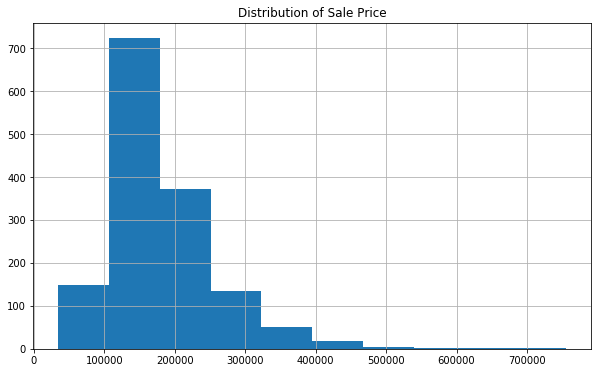

In [35]:
plt.figure(figsize = (10, 6))
housing['SalePrice'].hist()
plt.title('Distribution of Sale Price')

We can see that the distribution is skewed to the left, and there are some high outlier sale prices.  There are different ways of dealing with outliers.  You might want to leave or remove them.  Usually the decision is driven by model performance.  


#### Lots of variables!
When there are many variables, it is difficult to visualize them all together.  A pair plot or heatmap, is helpful for visualization of many variables together, if you want to see a big picture.  In this case, a subset of columns still needs to be taken.  

Below is a pairplot, using seaborn, on the numerical value column.

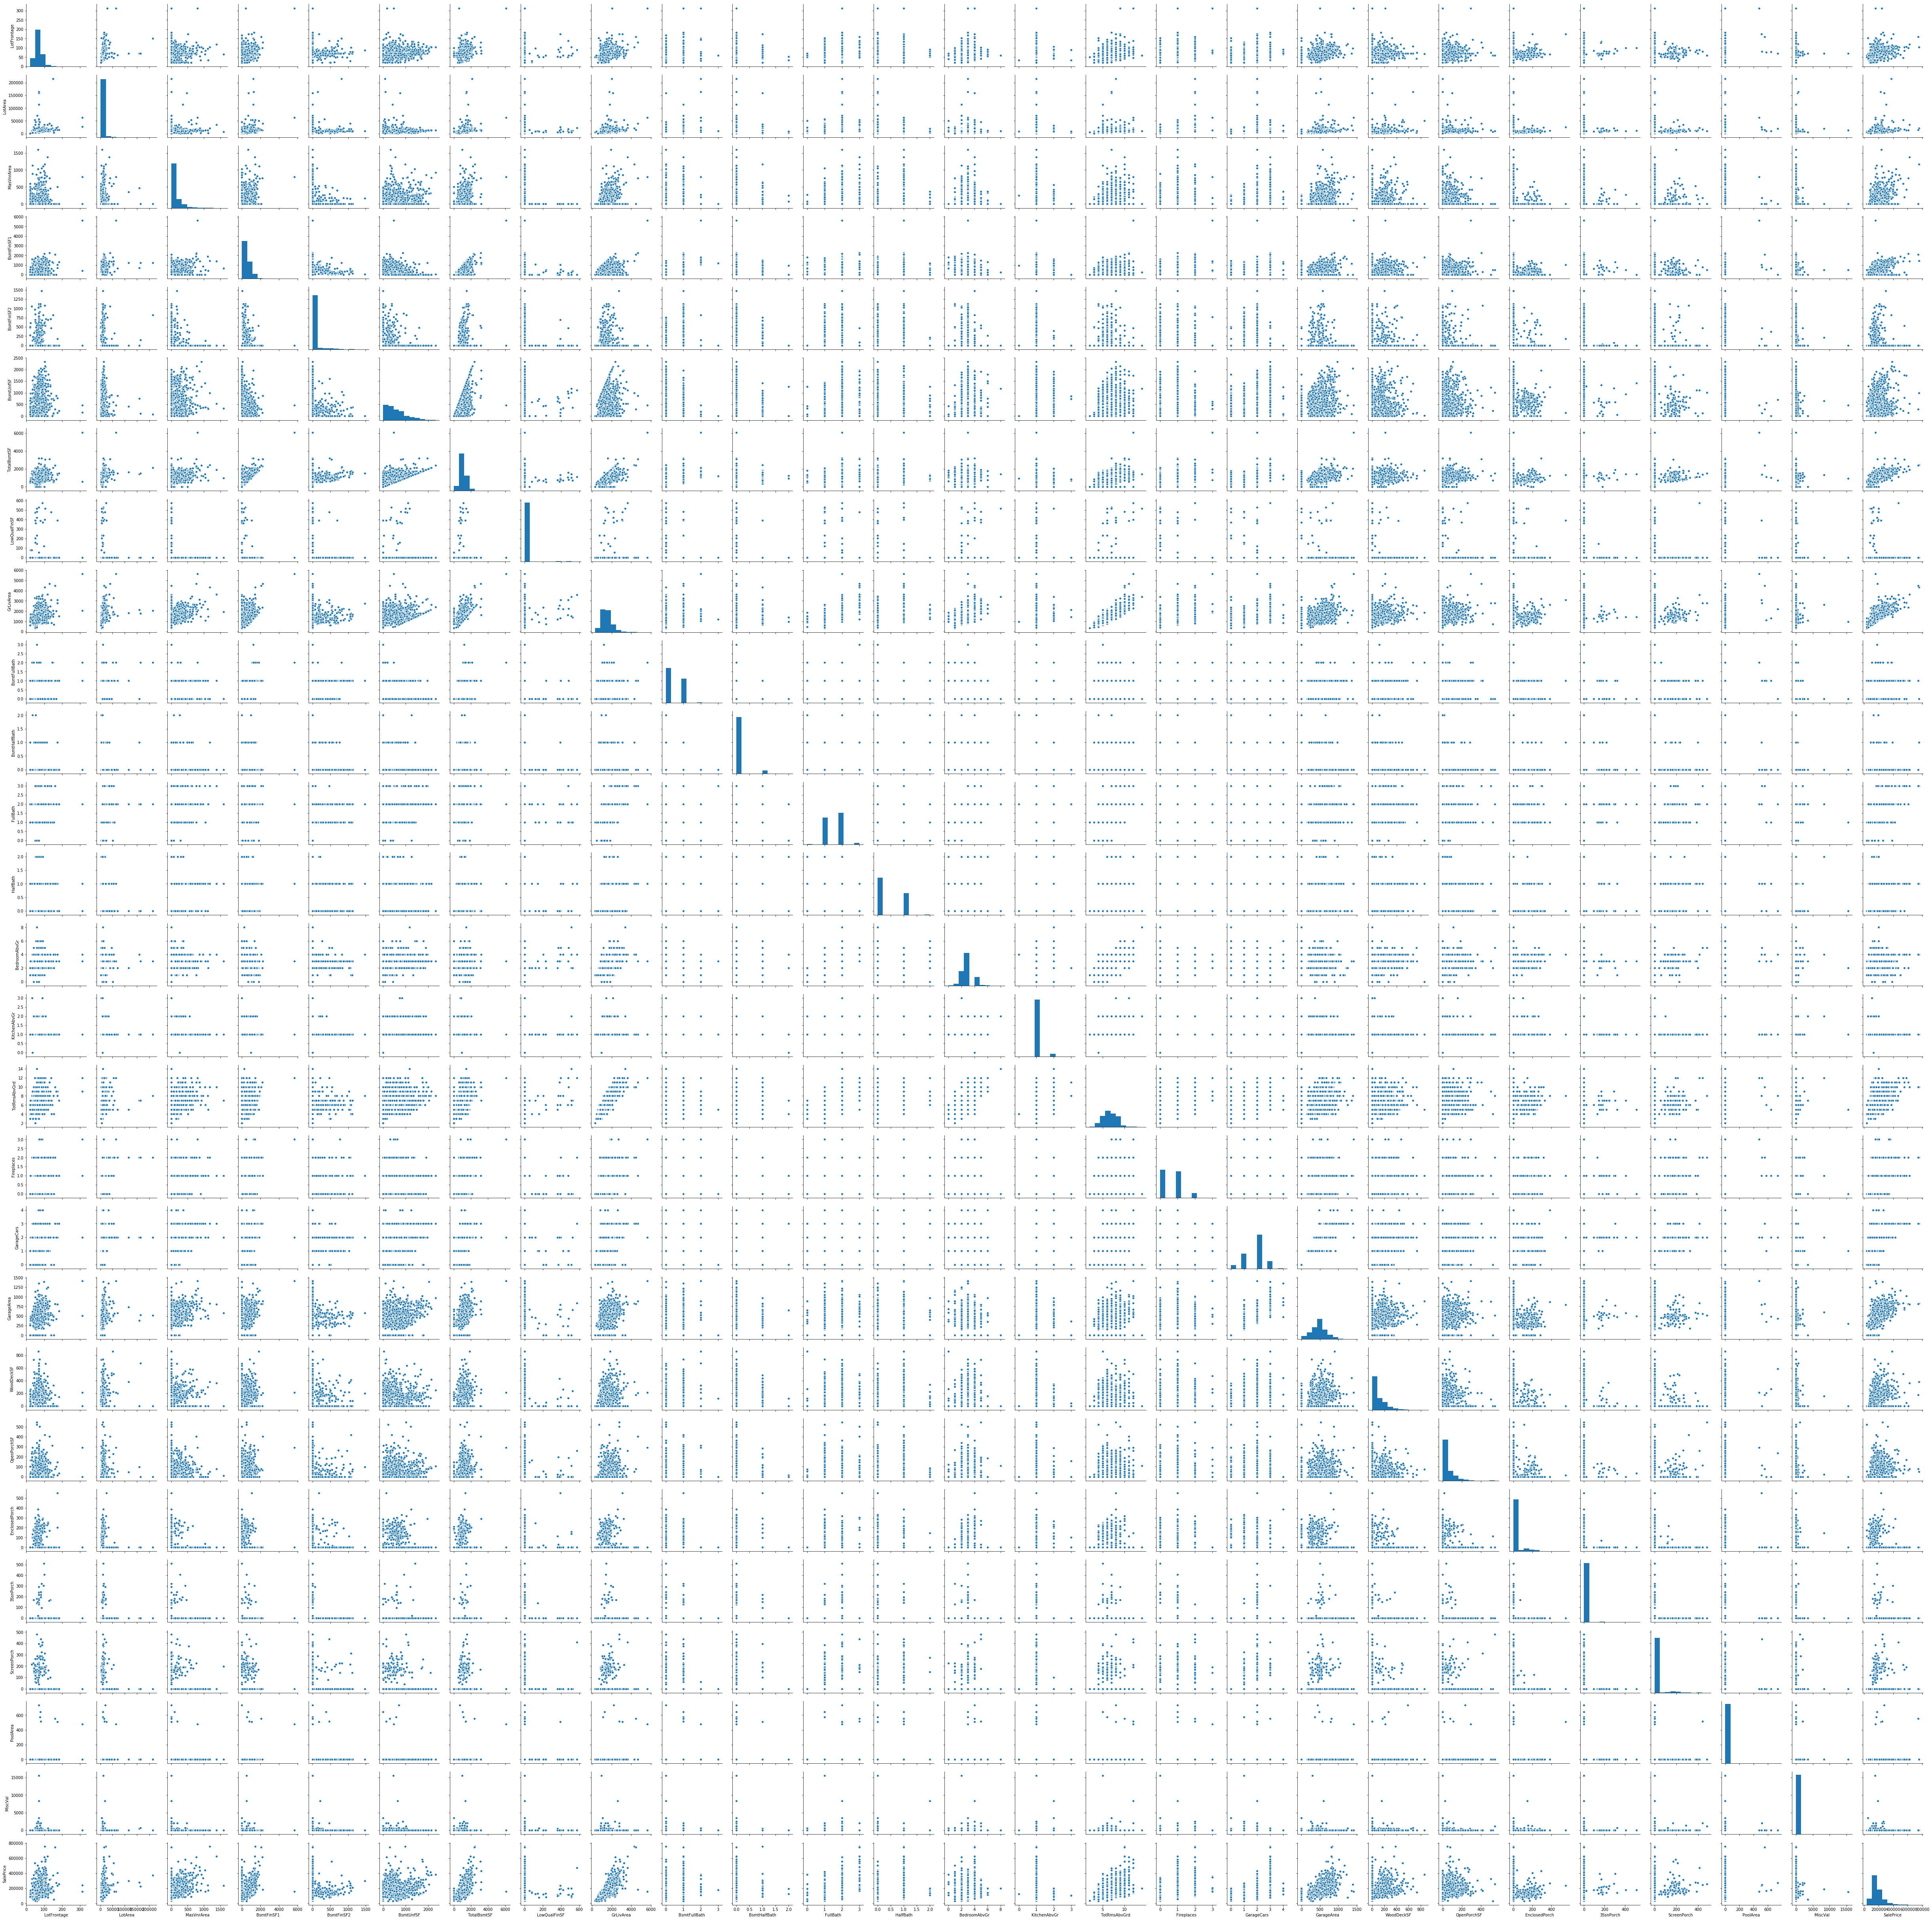

In [36]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#sns.pairplot(housing)
#I can do a heatmap on non object data types.


obj_cols=set(housing.select_dtypes(include=['object']).columns)
heatmap_cols=[col for col in list(housing.columns) if col not in obj_cols]
#set(untouched_cols).intersection(obj_cols)  #empty
#len(set(cols_to_impute).intersection(obj_cols)) 
#len(set(cols_to_transform).intersection(obj_cols)) 
#obj_cols #16


#heatmap_cols.remove('Id')
heatmap_cols=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
#untouched_cols.append('SalePrice')
#sns.heatmap(housing[heatmap_cols])
sns.pairplot(housing[heatmap_cols])
#print(untouched_cols)

#### Visualizations and relationships

Since this dataset was on Kaggle, there are many [contributed EDAs](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) of it that you can check out here.
Let's look at a few relationships and see how to construct these visuals.

The pairplot above is cool but overwhelming.  Let's look at correlations between variables, but specifically those most correlated with Sale Price.

In [37]:
#numeric_features = housing.select_dtypes(include=[np.number]) #nifty way to get specific dtypes
for c in ['SalePrice','OverallQual','OverallCond']:
    untouched_cols.append(c) 
correlation = housing[untouched_cols].corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



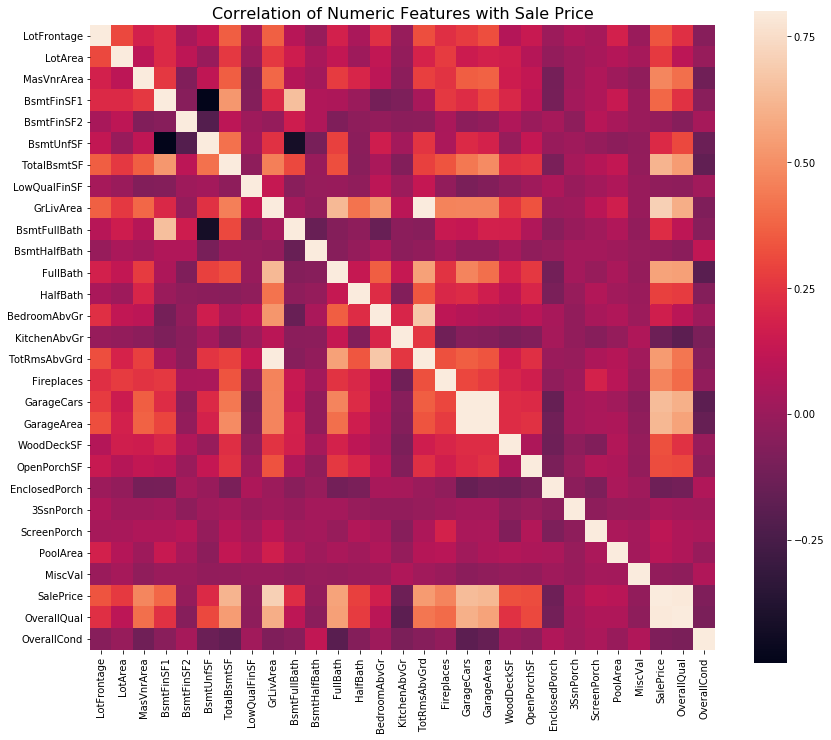

In [38]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Three of the top correlated variables with Sale Price are: GrLivArea', 'TotalBsmtSF', and 'OverallQual' 

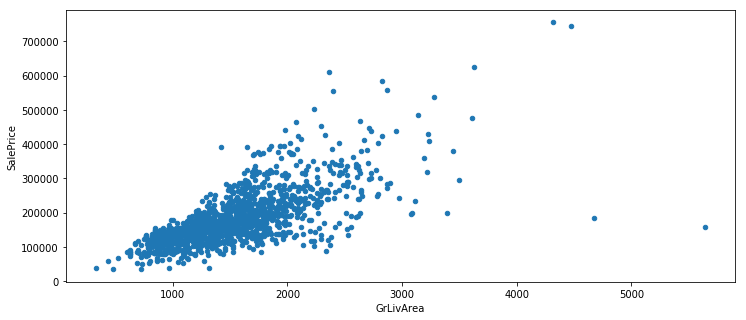

In [39]:
housing.plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(12, 5))

#### Sampling Data
In our case, we only have 1460 observations with 80 variables so we can work with all of the data and not have a problem with resources.  When we do need to sample, generally, it is a random sample so that we can still get the best representation of the original dataset.  There are [built in random sampling functions](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) to do this, that can be tweaked based on your use case and data.

Below uses the pandas dataframe sample function, that will select 30% of the original data.  Compare this to the above plot, which shows all of the data.

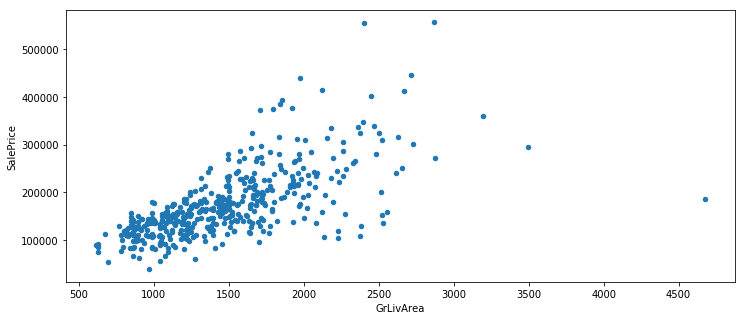

In [40]:
housing.sample(frac=.3).plot(kind='scatter', x='GrLivArea', y='SalePrice', figsize=(12, 5));

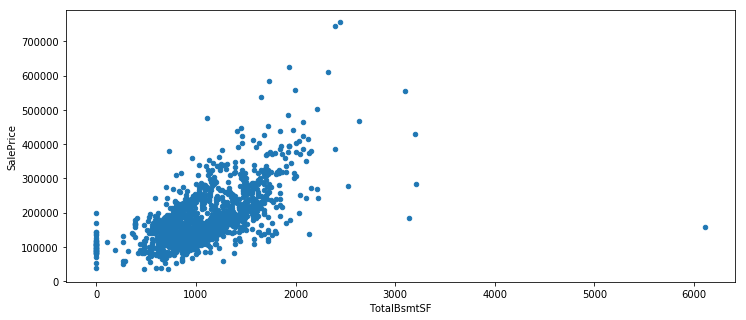

In [41]:
housing.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', figsize=(12, 5))

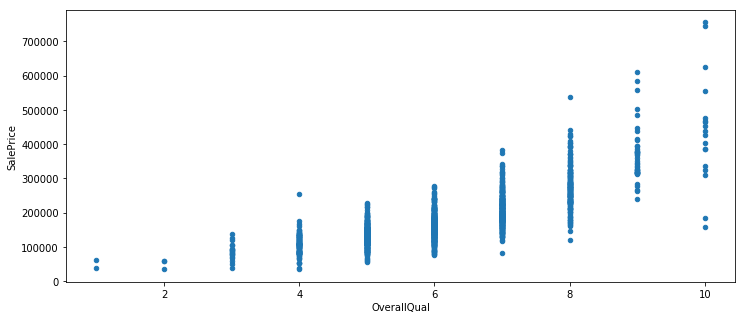

In [42]:
housing.plot(kind='scatter', x='OverallQual', y='SalePrice', figsize=(12, 5))

#### Figures 
There are many options to annotating and customizing your visualizations.  Here are the 3 graphs from above places together into a figure layout.

Text(0,0.5,'SalePrice')

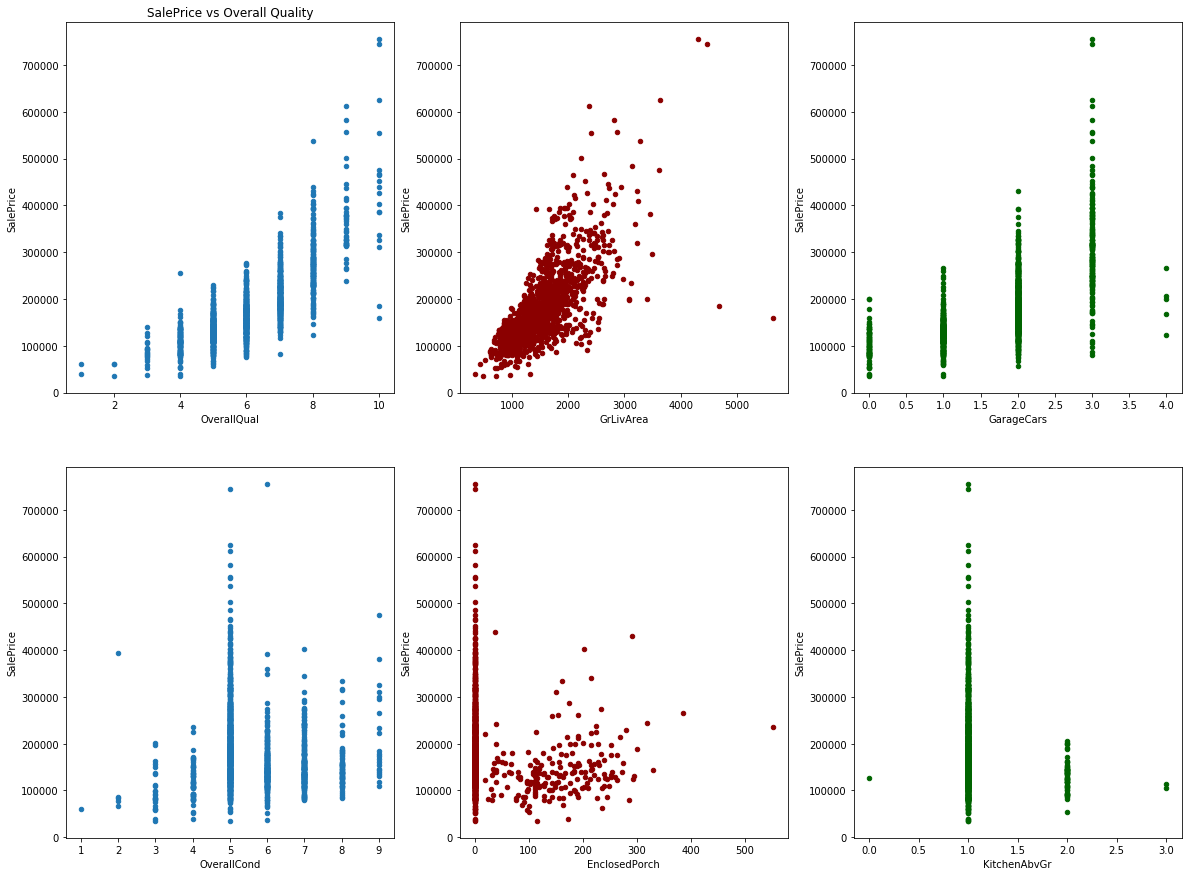

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

housing.plot(kind='scatter', x='OverallQual', y='SalePrice', ax=axes[0,0])
axes[0,0].set_xlabel("OverallQual")
axes[0,0].set_ylabel("SalePrice")
axes[0,0].set_title("SalePrice vs Overall Quality")

housing.plot(kind='scatter', x='GrLivArea', y='SalePrice', color='darkred', ax=axes[0,1])
axes[0,1].set_xlabel("GrLivArea")
axes[0,1].set_ylabel("SalePrice")

housing.plot(kind='scatter', x='GarageCars', y='SalePrice', color='darkgreen', ax=axes[0,2])
axes[0,2].set_xlabel("GarageCars")
axes[0,2].set_ylabel("SalePrice")

housing.plot(kind='scatter', x='OverallCond', y='SalePrice', ax=axes[1,0])
axes[1,0].set_xlabel("OverallCond")
axes[1,0].set_ylabel("SalePrice")

housing.plot(kind='scatter', x='EnclosedPorch', y='SalePrice', color='darkred', ax=axes[1,1])
axes[1,1].set_xlabel("EnclosedPorch")
axes[1,1].set_ylabel("SalePrice")

housing.plot(kind='scatter', x='KitchenAbvGr', y='SalePrice', color='darkgreen', ax=axes[1,2])
axes[1,2].set_xlabel("KitchenAbvGr")
axes[1,2].set_ylabel("SalePrice")


Let's throw in a line plot

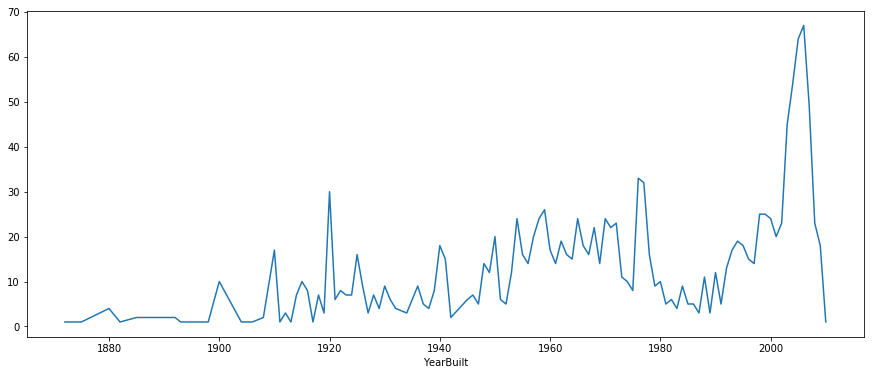

In [44]:
# Houses built per year

fig, ax = plt.subplots(figsize=(15,6))
housing.groupby(['YearBuilt']).count()['Id'].plot(ax=ax)

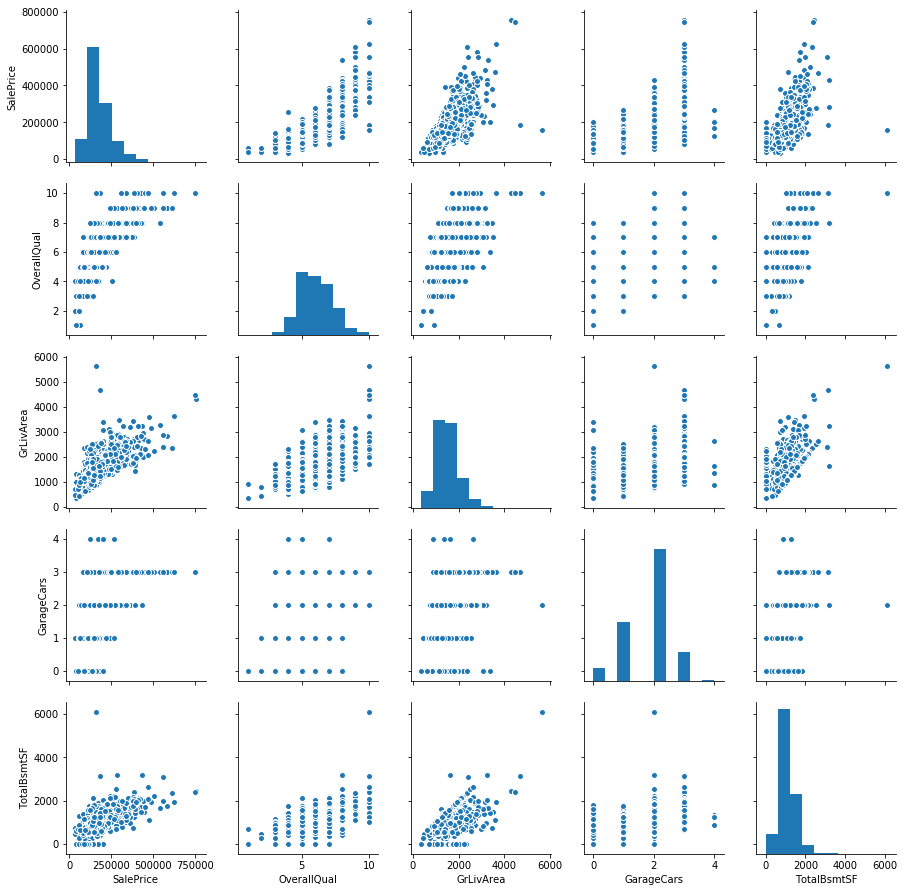

In [45]:
#one more pair plot on the variables most correlated with SalePrice
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(housing[cols])
plt.show()